In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
import os
import re 
import nltk 
from sklearn import preprocessing


from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB


from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
#Reading data
data=pd.read_csv("../input/flipkarttask/flipkart_com-ecommerce_sample - flipkart_com-ecommerce_sample - flipkart_com-ecommerce_sample.csv")
data.head(5)

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",..."


In [3]:
#Checking nulls in data
data.isnull().sum()

uniq_id                       0
crawl_timestamp               0
product_url                   0
product_name                  0
product_category_tree         0
pid                           0
retail_price                 78
discounted_price             78
image                         3
is_FK_Advantage_product       0
description                   2
product_rating                0
overall_rating                0
brand                      5864
product_specifications       14
dtype: int64

In [4]:
data.dtypes

uniq_id                     object
crawl_timestamp             object
product_url                 object
product_name                object
product_category_tree       object
pid                         object
retail_price               float64
discounted_price           float64
image                       object
is_FK_Advantage_product       bool
description                 object
product_rating              object
overall_rating              object
brand                       object
product_specifications      object
dtype: object

In [5]:
import string
def preprocess_string(text):
    '''
    input: str_arg --> Takes string to clean
    output: combined_text --> Gives back cleaned string
    This fuction cleans the text in the mentioned ways as comments after the line.This has been copied from some other kernel.

    '''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
    tokenized_text = tokenizer.tokenize(text)
    combined_text = ' '.join(tokenized_text)
    
    return combined_text


In [6]:
# Reading relevant data
data['product_category_tree'] = data['product_category_tree'].apply(lambda x : x.split('>>')[0][2:].strip())

In [7]:
d=data["product_category_tree"].value_counts().to_dict()
lists = (d.items()) # sorted by key, return a list of tuples

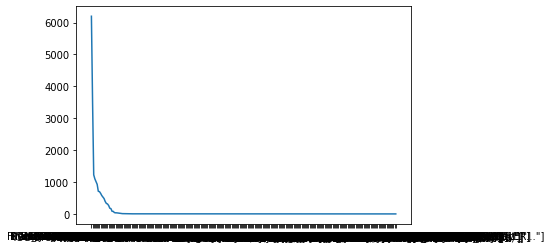

In [8]:
import matplotlib.pylab as plt
x, y = zip(*lists) # unpack a list of pairs into two tuples

plt.plot(x, y)
plt.show()

<AxesSubplot:>

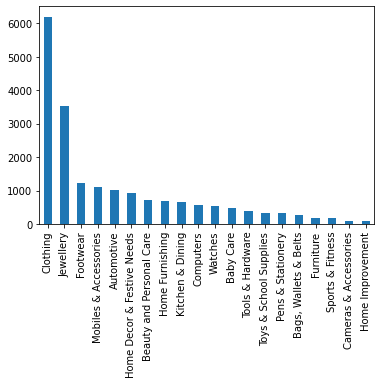

In [9]:
top_20_gen = list(data.groupby('product_category_tree').count().sort_values(by='uniq_id',ascending=False).head(20).index)

processed_df = data[data['product_category_tree'].isin(top_20_gen)][['product_category_tree','description']]
processed_df['product_category_tree'].value_counts().plot(kind='bar')

In [10]:
processed_df['product_category_tree'].value_counts()

Clothing                      6198
Jewellery                     3531
Footwear                      1227
Mobiles & Accessories         1099
Automotive                    1012
Home Decor & Festive Needs     929
Beauty and Personal Care       710
Home Furnishing                700
Kitchen & Dining               647
Computers                      578
Watches                        530
Baby Care                      483
Tools & Hardware               391
Toys & School Supplies         330
Pens & Stationery              313
Bags, Wallets & Belts          265
Furniture                      180
Sports & Fitness               166
Cameras & Accessories           82
Home Improvement                81
Name: product_category_tree, dtype: int64

In [11]:
# Category processing. (Check data to understand)
# Taking most popular 15 items only
top_15_gen = list(data.groupby('product_category_tree').count().sort_values(by='uniq_id',ascending=False).head(15).index)
# Taking only top 15 categories for example sake
processed_df = data[data['product_category_tree'].isin(top_15_gen)][['product_category_tree','description']]
# Selecting only relevant columns
processed_df['description'] = data['description'].astype('str').apply(preprocess_string)
# Cleaning strings
cat_list = list(processed_df['product_category_tree'].unique())
# Creating a list of categories for later use
print(cat_list)
# Printing the list of top 5 categories
le = preprocessing.LabelEncoder()
category_encoded=le.fit_transform(processed_df['product_category_tree'])
processed_df['product_category_tree'] = category_encoded
# Encoding the product category

['Clothing', 'Footwear', 'Pens & Stationery', 'Beauty and Personal Care', 'Home Decor & Festive Needs', 'Automotive', 'Tools & Hardware', 'Home Furnishing', 'Baby Care', 'Mobiles & Accessories', 'Watches', 'Toys & School Supplies', 'Jewellery', 'Kitchen & Dining', 'Computers']


In [12]:
processed_df["product_category_tree"].unique().shape

(15,)

In [13]:
processed_df

,product_category_tree,description
0,3,key features of alisha solid womens cycling sh...
2,5,key features of aw bellies sandals wedges heel...
3,3,key features of alisha solid womens cycling sh...
6,3,key features of alisha solid womens cycling sh...
8,5,key features of dilli bazaaar bellies corporat...
...,...,...
19995,1,buy walldesign small vinyl sticker for online ...
19996,1,buy wallmantra large vinyl stickers sticker fo...
19997,1,buy elite collection medium acrylic sticker fo...
19998,1,buy elite collection medium acrylic sticker fo...


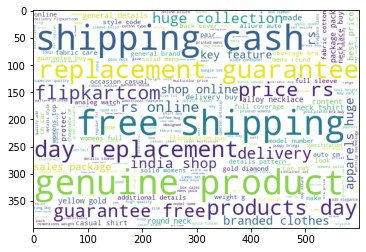

In [14]:
# Plotting WordCloud of whole description to see which words are more repeated and hold more value
from wordcloud import WordCloud
cleaned_text=processed_df.description.values
wordcloud = WordCloud( background_color='white',
                        width=600,
                        height=400).generate(" ".join(cleaned_text))
plt.imshow(wordcloud)

In [15]:
from collections import Counter
processed_df['temp_list'] =processed_df['description'].apply(lambda x:str(x).split())
top = Counter([item for sublist in processed_df['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(15))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

,Common_words,count
0,of,28223
1,for,28219
2,the,20687
3,and,19881
4,only,19709
5,in,16792
6,rs,14409
7,to,13005
8,with,12823
9,on,11212


Since we have to predcit product primary category using product description only.. So applying our NLP knowledge:)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(processed_df['description'],processed_df['product_category_tree'],test_size=0.2)

In [17]:
'''
This code block is for converting the training data to vectorized form

'''
vect = CountVectorizer(stop_words = 'english')
# Removing stop words
X_train_matrix = vect.fit_transform(X_train) 
# Converting the train data
X_test_matrix = vect.transform(X_test)

In [18]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif
fselect = SelectKBest(chi2 , k=10000)
train_features = fselect.fit_transform(X_train_matrix, y_train)
test_features = fselect.transform(X_test_matrix)

In [19]:
test_features

<3736x10000 sparse matrix of type '<class 'numpy.int64'>'
	with 96713 stored elements in Compressed Sparse Row format>

In [20]:
'''
This code block is for training vectorized data and predicting & scoring test data

'''
from sklearn.naive_bayes import MultinomialNB
clf=MultinomialNB()
# Defining model
clf.fit(train_features, y_train)
# Fitting to multinomial NB model 
print(clf.score(train_features, y_train))
# Scoring the trained model (Expected to be above 95 percent)
# Converting the test data
print (clf.score(test_features, y_test))
# Scoring for the test data
predicted_result=clf.predict(test_features)
print(classification_report(y_test,predicted_result))
# Printing score 

0.9660687993575158
0.9542291220556746
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       199
           1       0.82      0.68      0.74        91
           2       0.85      0.92      0.88       139
           3       0.99      0.98      0.99      1296
           4       0.89      0.78      0.83       109
           5       0.99      0.98      0.99       251
           6       0.93      0.97      0.95       186
           7       0.88      1.00      0.94       135
           8       0.95      1.00      0.97       711
           9       0.97      0.88      0.92       129
          10       0.98      0.89      0.93       195
          11       0.97      0.61      0.75        59
          12       0.94      0.93      0.93        81
          13       0.75      0.95      0.84        55
          14       1.00      1.00      1.00       100

    accuracy                           0.95      3736
   macro avg       0.92      0.90      0.9

In [21]:
knn = KNeighborsClassifier()

knn.fit(train_features, y_train)

print (knn.score(test_features, y_test))
# Scoring for the test data
predicted_result=knn.predict(test_features)
print(classification_report(y_test,predicted_result))

0.9421841541755889
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       199
           1       0.90      0.70      0.79        91
           2       0.97      0.86      0.91       139
           3       0.95      1.00      0.97      1296
           4       0.79      0.90      0.84       109
           5       0.98      0.95      0.97       251
           6       0.99      0.85      0.92       186
           7       0.87      0.96      0.91       135
           8       0.96      0.98      0.97       711
           9       0.93      0.88      0.90       129
          10       0.92      0.93      0.92       195
          11       0.82      0.69      0.75        59
          12       1.00      0.81      0.90        81
          13       0.81      0.64      0.71        55
          14       1.00      0.99      0.99       100

    accuracy                           0.94      3736
   macro avg       0.92      0.87      0.89      3736
weighte

In [22]:
clf = DecisionTreeClassifier(random_state=42)

clf.fit(train_features, y_train)
# Fitting to multinomial NB model 
print(clf.score(train_features, y_train))
# Scoring the trained model (Expected to be above 95 percent)
# X_test_matrix = vect.transform(X_test) 
# Converting the test data
print (clf.score(test_features, y_test))
# Scoring for the test data
predicted_result=clf.predict(test_features)
print(classification_report(y_test,predicted_result))

0.9992638201044037
0.9644004282655246
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       199
           1       0.92      0.77      0.84        91
           2       0.96      0.94      0.95       139
           3       0.99      0.98      0.99      1296
           4       0.92      0.94      0.93       109
           5       0.98      0.97      0.98       251
           6       0.94      0.91      0.92       186
           7       0.89      0.99      0.94       135
           8       0.99      1.00      0.99       711
           9       0.90      0.97      0.93       129
          10       0.94      0.95      0.95       195
          11       0.75      0.71      0.73        59
          12       0.97      0.96      0.97        81
          13       0.86      0.80      0.83        55
          14       0.95      0.99      0.97       100

    accuracy                           0.96      3736
   macro avg       0.93      0.92      0.9

In [23]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=42, max_depth = 101,min_samples_split= 5, min_samples_leaf = 1)
clf.fit(train_features, y_train)
# Fitting to multinomial NB model 
print(clf.score(train_features, y_train))

# Converting the test data
print (clf.score(test_features, y_test))
# Scoring for the test data
predicted_result=clf.predict(test_features)
print(classification_report(y_test,predicted_result))

0.9973229821978317
0.9753747323340471
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       199
           1       1.00      0.77      0.87        91
           2       0.99      0.96      0.97       139
           3       0.98      1.00      0.99      1296
           4       0.97      0.89      0.93       109
           5       1.00      0.98      0.99       251
           6       0.98      0.98      0.98       186
           7       0.94      0.98      0.96       135
           8       0.98      1.00      0.99       711
           9       0.89      0.98      0.93       129
          10       0.97      0.98      0.97       195
          11       0.95      0.71      0.82        59
          12       1.00      0.94      0.97        81
          13       0.86      0.91      0.88        55
          14       1.00      0.99      0.99       100

    accuracy                           0.98      3736
   macro avg       0.97      0.94      0.9

In [24]:
import xgboost as xgb

clf = xgb.XGBClassifier(max_depth=25,subsample=1, learning_rate=0.07, reg_lambda=0.1, reg_alpha=0.1,gamma=1)
clf.fit(train_features, y_train)
# Fitting to XGBC model 
print(clf.score(train_features, y_train))

print (clf.score(test_features, y_test))
# Scoring for the test data
predicted_result=clf.predict(test_features)
print(classification_report(y_test,predicted_result))

[10:06:43] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.9955829206264222
0.9748394004282656
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       199
           1       0.91      0.81      0.86        91
           2       0.96      0.94      0.95       139
           3       1.00      0.99      0.99      1296
           4       0.90      0.96      0.93       109
           5       1.00      0.98      0.99       251
           6       0.97      0.96      0.96       186
           7       0.91      1.00      0.95       135
           8       0.99      1.00      0.99       711
           9       0.93      0.98      0.95       129
          10       0.97      0.96      0.97       195
          11       0.87      0.78      0.82        59
      

In [25]:
import lightgbm as lgb
clf = lgb.LGBMClassifier(random_state=42,num_leaves=31,learning_rate=0.1)
clf.fit(train_features.astype(float), y_train)
# Fitting to LGBM model 
print(clf.score(train_features.astype(float), y_train))

# Converting the test data
print (clf.score(test_features.astype(float), y_test))
# Scoring for the test data
predicted_result=clf.predict(test_features.astype(float))
print(classification_report(y_test,predicted_result))

0.9979253112033195
0.9796573875802997
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       199
           1       0.91      0.89      0.90        91
           2       0.96      0.97      0.97       139
           3       1.00      0.99      1.00      1296
           4       0.93      0.97      0.95       109
           5       1.00      0.99      0.99       251
           6       0.98      0.97      0.97       186
           7       0.94      1.00      0.97       135
           8       1.00      1.00      1.00       711
           9       0.93      0.98      0.95       129
          10       0.98      0.97      0.98       195
          11       0.83      0.75      0.79        59
          12       1.00      0.94      0.97        81
          13       0.78      0.84      0.81        55
          14       1.00      1.00      1.00       100

    accuracy                           0.98      3736
   macro avg       0.95      0.95      0.9

In [26]:
'''
This code block is for converting the training data to Tf-Idf form

'''
vectorizer = TfidfVectorizer(stop_words = 'english')
# Removing stop words
X_train_tfidf = vectorizer.fit_transform(X_train)
# Converting the train data

In [27]:
X_train_tfidf.shape

(14942, 20357)

In [28]:
X_test_tfidf = vectorizer.transform(X_test) 

In [29]:
X_train_tfidf = fselect.fit_transform(X_train_tfidf, y_train)
X_test_tfidf = fselect.transform(X_test_tfidf)

In [30]:
'''
This code block is for training, predicting & scoring test data

'''
clf2=MultinomialNB()
# Defining model
clf2.fit(X_train_tfidf, y_train)
# Fitting to multinomial NB model 
print(clf2.score(X_train_tfidf, y_train))
# Scoring the trained model (Expected to be above 95 percent)
# X_test_tfidf = vectorizer.transform(X_test) 
# Converting the test data
print (clf2.score(X_test_tfidf, y_test))
# Printing score 

0.9401686521215367
0.9242505353319058


In [31]:
clf = RandomForestClassifier()
clf.fit(X_train_tfidf, y_train)
# Fitting to RFC model 
print(clf.score(X_train_tfidf, y_train))

# Converting the test data
print (clf.score(X_test_tfidf, y_test))
# Scoring for the test data
predicted_result=clf.predict(X_test_tfidf)
print(classification_report(y_test,predicted_result))

0.9992638201044037
0.9676124197002142
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       199
           1       0.98      0.71      0.83        91
           2       0.98      0.92      0.95       139
           3       0.98      1.00      0.99      1296
           4       0.91      0.93      0.92       109
           5       1.00      0.96      0.98       251
           6       0.93      0.97      0.95       186
           7       0.91      0.96      0.93       135
           8       0.99      1.00      0.99       711
           9       0.89      0.95      0.92       129
          10       0.96      0.97      0.96       195
          11       0.93      0.64      0.76        59
          12       1.00      0.94      0.97        81
          13       0.83      0.91      0.87        55
          14       1.00      0.99      0.99       100

    accuracy                           0.97      3736
   macro avg       0.95      0.92      0.9

In [32]:
clf = lgb.LGBMClassifier(random_state=42,num_leaves=31,learning_rate=0.1)
clf.fit(X_train_tfidf, y_train)
# Fitting to LGBMC model 
print(clf.score(X_train_tfidf, y_train))

print (clf.score(X_test_tfidf, y_test))
# Scoring for the test data
predicted_result=clf.predict(X_test_tfidf)
print(classification_report(y_test,predicted_result))

0.9991968946593495
0.9775160599571735
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       199
           1       0.89      0.80      0.84        91
           2       0.99      0.96      0.97       139
           3       1.00      1.00      1.00      1296
           4       0.93      0.97      0.95       109
           5       1.00      0.98      0.99       251
           6       0.97      0.96      0.96       186
           7       0.92      1.00      0.96       135
           8       1.00      1.00      1.00       711
           9       0.93      0.98      0.95       129
          10       0.98      0.97      0.98       195
          11       0.78      0.76      0.77        59
          12       0.99      0.96      0.97        81
          13       0.83      0.82      0.83        55
          14       1.00      1.00      1.00       100

    accuracy                           0.98      3736
   macro avg       0.94      0.94      0.9

In [33]:
from sklearn.svm import SVC
clf = SVC(gamma='scale', kernel='rbf', C=3)
clf.fit(X_train_tfidf, y_train)
# Fitting to SVC model 
print(clf.score(X_train_tfidf, y_train))

print (clf.score(X_test_tfidf, y_test))
# Scoring for the test data
predicted_result=clf.predict(X_test_tfidf)
print(classification_report(y_test,predicted_result))

0.9989291928791326
0.982066381156317
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       199
           1       0.95      0.84      0.89        91
           2       0.97      0.96      0.97       139
           3       0.99      1.00      0.99      1296
           4       0.97      0.97      0.97       109
           5       1.00      0.99      0.99       251
           6       0.96      0.99      0.98       186
           7       0.95      0.99      0.97       135
           8       0.99      1.00      1.00       711
           9       0.98      0.98      0.98       129
          10       0.98      0.97      0.98       195
          11       0.90      0.76      0.83        59
          12       1.00      0.95      0.97        81
          13       0.84      0.87      0.86        55
          14       1.00      1.00      1.00       100

    accuracy                           0.98      3736
   macro avg       0.97      0.95      0.96

In [34]:
# Build out our simple LSTM
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM
from keras.utils.np_utils import to_categorical
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from keras.optimizers import Adam


embed_dim = 128
lstm_out = 196

# Model saving callback
ckpt_callback = ModelCheckpoint('keras_model', 
                                 monitor='val_loss', 
                                 verbose=1, 
                                 save_best_only=True, 
                                 mode='auto')

In [35]:
processed_df

,product_category_tree,description,temp_list
0,3,key features of alisha solid womens cycling sh...,"[key, features, of, alisha, solid, womens, cyc..."
2,5,key features of aw bellies sandals wedges heel...,"[key, features, of, aw, bellies, sandals, wedg..."
3,3,key features of alisha solid womens cycling sh...,"[key, features, of, alisha, solid, womens, cyc..."
6,3,key features of alisha solid womens cycling sh...,"[key, features, of, alisha, solid, womens, cyc..."
8,5,key features of dilli bazaaar bellies corporat...,"[key, features, of, dilli, bazaaar, bellies, c..."
...,...,...,...
19995,1,buy walldesign small vinyl sticker for online ...,"[buy, walldesign, small, vinyl, sticker, for, ..."
19996,1,buy wallmantra large vinyl stickers sticker fo...,"[buy, wallmantra, large, vinyl, stickers, stic..."
19997,1,buy elite collection medium acrylic sticker fo...,"[buy, elite, collection, medium, acrylic, stic..."
19998,1,buy elite collection medium acrylic sticker fo...,"[buy, elite, collection, medium, acrylic, stic..."


In [36]:
# Use the Keras tokenizer
num_words = 500
tokenizer = Tokenizer(num_words=num_words)
tokenizer.fit_on_texts(processed_df['description'].values)
# Pad the data 
X = tokenizer.texts_to_sequences(processed_df['description'].values)
X = pad_sequences(X, maxlen=500)

In [37]:
X.shape

(18678, 500)

In [38]:
model = Sequential()
model.add(Embedding(num_words, embed_dim, input_length = X.shape[1]))
model.add(LSTM(lstm_out, recurrent_dropout=0.2, dropout=0.2))
model.add(Dense(15,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics = ['categorical_crossentropy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 500, 128)          64000     
_________________________________________________________________
lstm (LSTM)                  (None, 196)               254800    
_________________________________________________________________
dense (Dense)                (None, 15)                2955      
Total params: 321,755
Trainable params: 321,755
Non-trainable params: 0
_________________________________________________________________
None


In [39]:
Y = pd.get_dummies(processed_df['product_category_tree']).values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42, stratify=Y)
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(14942, 500) (14942, 15)
(3736, 500) (3736, 15)


In [40]:
batch_size = 32
model.fit(X_train, Y_train, epochs=8, batch_size=batch_size, validation_split=0.2, callbacks=[ckpt_callback])

Epoch 1/8
374/374 [==============================] - 1194s 3s/step - loss: 1.5472 - categorical_crossentropy: 1.5472 - val_loss: 0.6652 - val_categorical_crossentropy: 0.6652

Epoch 00001: val_loss improved from inf to 0.66517, saving model to keras_model
Epoch 2/8
374/374 [==============================] - 1182s 3s/step - loss: 0.6059 - categorical_crossentropy: 0.6059 - val_loss: 0.4847 - val_categorical_crossentropy: 0.4847

Epoch 00002: val_loss improved from 0.66517 to 0.48468, saving model to keras_model
Epoch 3/8
374/374 [==============================] - 1192s 3s/step - loss: 0.4199 - categorical_crossentropy: 0.4199 - val_loss: 0.3355 - val_categorical_crossentropy: 0.3355

Epoch 00003: val_loss improved from 0.48468 to 0.33547, saving model to keras_model
Epoch 4/8
374/374 [==============================] - 1215s 3s/step - loss: 0.3685 - categorical_crossentropy: 0.3685 - val_loss: 0.3178 - val_categorical_crossentropy: 0.3178

Epoch 00004: val_loss improved from 0.33547 to 0

In [41]:
from sklearn.metrics import log_loss, accuracy_score
model = load_model('keras_model')
probas = model.predict(X_test)
pred_indices = np.argmax(probas, axis=1)
classes = np.array(range(0, 15))
preds = classes[pred_indices]
print('Log loss: {}'.format(log_loss(classes[np.argmax(Y_test, axis=1)], probas)))
print('Accuracy: {}'.format(accuracy_score(classes[np.argmax(Y_test, axis=1)], preds)))

Log loss: 0.27220103942708207
Accuracy: 0.9170235546038544


In [ ]:
# We can train it for more epochs to get good accuracy as each epoch is taking huge time, but if run on good GPU, we can get good accuracy:)

In [42]:
# Ref.: https://www.kaggle.com/abhishek/distilbert-use-features-oof/notebook

def chunks(l, n):
    for i in range(0, len(l), n):
        yield l[i:i + n]


def fetch_vectors(string_list, batch_size=64):
    # inspired by https://jalammar.github.io/a-visual-guide-to-using-bert-for-the-first-time/
    DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    tokenizer = transformers.DistilBertTokenizer.from_pretrained("../input/distilbertbaseuncased/")
    model = transformers.DistilBertModel.from_pretrained("../input/distilbertbaseuncased/")
    model.to(DEVICE)

    fin_features = []
    total = len(string_list) // batch_size + 1
    for data in tqdm(chunks(string_list, batch_size), total=total):
        tokenized = []
        for x in data:
            x = " ".join(x.strip().split()[:300])
            tok = tokenizer.encode(x, add_special_tokens=True)
            tokenized.append(tok[:512])

        max_len = 512
        padded = np.array([i + [0] * (max_len - len(i)) for i in tokenized])
        attention_mask = np.where(padded != 0, 1, 0)
        input_ids = torch.tensor(padded).to(DEVICE)
        attention_mask = torch.tensor(attention_mask).to(DEVICE)
        
        with torch.no_grad():
            last_hidden_states = model(input_ids, attention_mask=attention_mask)

        features = last_hidden_states[0][:, 0, :].cpu().numpy()
        fin_features.append(features)

    fin_features = np.vstack(fin_features)
    return fin_features

In [43]:
import torch
import transformers
from tqdm.notebook import tqdm
# vectors = fetch_vectors(processed_df.description.values)
# vectors.shape

# Not running this command as I have run this command over Kaggle IDE. There We are having very less memory, But as we know,
# Modelling over Bert Embeddings can give good score. Here I have used pretrained embeddings:

In [44]:
# np.save("vectors.npy",vectors)

In [45]:
# For visualisation of Bert embeddings By TSNE 

# from sklearn.manifold import TSNE
# reduced = TSNE(n_components=2).fit_transform(vectors)
# reduced.shape